# Importing the libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the dataset

In [9]:
dataset=pd.read_csv("Fraud.csv")
dataset

,Date,nameOrig,amount,oldbalanceOrg,newbalanceOrig,City,type,Card Type,Exp Type,Gender,isFraud
0,26-May-13,C2011200430,242.00,302.0,60.00,"Ahmedabad, India",TRANSFER,Gold,Food,F,1
1,26-Jul-12,C931301500,7081.00,46066.0,38985.00,"Delhi, India",TRANSFER,Gold,Entertainment,M,1
2,12-Apr-12,C963642457,16355.00,30355.0,14000.00,"Kolkata, India",TRANSFER,Silver,Fuel,F,1
3,28-Jan-12,C1439438217,20820.00,39663.0,18843.00,"Lucknow, India",TRANSFER,Gold,Food,F,1
4,16-Apr-14,C892940485,6071.00,35586.0,29515.00,"Bengaluru, India",TRANSFER,Gold,Fuel,M,1
...,...,...,...,...,...,...,...,...,...,...,...
1048569,20-Jan-14,C1273896430,105150.78,38300000.0,38194849.22,"Kanpur, India",CASH_IN,Platinum,Fuel,F,0
1048570,06-Mar-14,C1450387949,376022.62,38600000.0,38223977.38,"Kanpur, India",CASH_IN,Gold,Grocery,F,0
1048571,13-Mar-13,C1040382471,77083.57,38400000.0,38322916.43,"Jaipur, India",CASH_IN,Gold,Fuel,F,0
1048572,02-Apr-14,C1576842193,121569.82,38400000.0,38278430.18,"Surat, India",CASH_IN,Platinum,Grocery,F,0


# Seperating dependent and Independent variables

In [10]:
a=dataset.iloc[:,2:4].values
b=dataset.iloc[:,4].values
a

array([[2.4200000e+02, 3.0200000e+02],
       [7.0810000e+03, 4.6066000e+04],
       [1.6355000e+04, 3.0355000e+04],
       ...,
       [7.7083570e+04, 3.8400000e+07],
       [1.2156982e+05, 3.8400000e+07],
       [6.8089900e+03, 3.8900000e+07]])

In [11]:
b

array([6.00000000e+01, 3.89850000e+04, 1.40000000e+04, ...,
       3.83229164e+07, 3.82784302e+07, 3.88931910e+07])

In [12]:
b=b.reshape(-1,1)
b

array([[6.00000000e+01],
       [3.89850000e+04],
       [1.40000000e+04],
       ...,
       [3.83229164e+07],
       [3.82784302e+07],
       [3.88931910e+07]])

# Splitting the dataset into training and test set

In [13]:
from sklearn.model_selection import train_test_split
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.2,random_state=0)
a_train

array([[0.00000000e+00, 0.00000000e+00],
       [2.00110000e+04, 3.77550000e+04],
       [4.94018500e+04, 9.53969293e+06],
       ...,
       [0.00000000e+00, 0.00000000e+00],
       [3.67000000e+02, 7.12800000e+03],
       [9.40180400e+04, 4.87748170e+06]])

In [14]:
a_test

array([[1.9155500e+03, 3.0449935e+05],
       [1.5445403e+05, 2.5500000e+07],
       [0.0000000e+00, 0.0000000e+00],
       ...,
       [3.4637000e+04, 9.2300000e+04],
       [0.0000000e+00, 0.0000000e+00],
       [1.7415400e+03, 4.2154000e+04]])

In [15]:
b_train

array([[0.00000000e+00],
       [1.77440000e+04],
       [9.49029108e+06],
       ...,
       [0.00000000e+00],
       [6.76100000e+03],
       [4.78346366e+06]])

In [16]:
b_test

array([[  302583.8 ],
       [25345545.97],
       [       0.  ],
       ...,
       [   57663.  ],
       [       0.  ],
       [   40412.46]])

# 

# Training the Regression

In [17]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(a_train,b_train)

LinearRegression()

# Predicting test set results

In [18]:
b_pred=regressor.predict(a_test)
b_pred

array([[3.02583800e+05],
       [2.53455460e+07],
       [2.29338184e-08],
       ...,
       [5.76630000e+04],
       [2.29338184e-08],
       [4.04124600e+04]])

# Sample prediction

In [19]:
regressor.predict([[242,342]])

array([[100.00000002]])

# 

# Removing unwanted datasets that are not needed for ML

In [20]:
data=dataset.drop(['City','Date','nameOrig','type','Card Type','Gender'],axis=1)
data

,amount,oldbalanceOrg,newbalanceOrig,Exp Type,isFraud
0,242.00,302.0,60.00,Food,1
1,7081.00,46066.0,38985.00,Entertainment,1
2,16355.00,30355.0,14000.00,Fuel,1
3,20820.00,39663.0,18843.00,Food,1
4,6071.00,35586.0,29515.00,Fuel,1
...,...,...,...,...,...
1048569,105150.78,38300000.0,38194849.22,Fuel,0
1048570,376022.62,38600000.0,38223977.38,Grocery,0
1048571,77083.57,38400000.0,38322916.43,Fuel,0
1048572,121569.82,38400000.0,38278430.18,Grocery,0


# Seperating dependent and independent variables

In [21]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
x=pd.DataFrame(x)
x


,0,1,2,3
0,242.0,302.0,60.0,Food
1,7081.0,46066.0,38985.0,Entertainment
2,16355.0,30355.0,14000.0,Fuel
3,20820.0,39663.0,18843.0,Food
4,6071.0,35586.0,29515.0,Fuel
...,...,...,...,...
1048569,105150.78,38300000.0,38194849.22,Fuel
1048570,376022.62,38600000.0,38223977.38,Grocery
1048571,77083.57,38400000.0,38322916.43,Fuel
1048572,121569.82,38400000.0,38278430.18,Grocery


# Encoding categorical data

In [22]:
c=x.iloc[:,-1].values
c=pd.DataFrame(c)
c

,0
0,Food
1,Entertainment
2,Fuel
3,Food
4,Fuel
...,...
1048569,Fuel
1048570,Grocery
1048571,Fuel
1048572,Grocery


In [23]:
del x[3]
x

,0,1,2
0,242.0,302.0,60.0
1,7081.0,46066.0,38985.0
2,16355.0,30355.0,14000.0
3,20820.0,39663.0,18843.0
4,6071.0,35586.0,29515.0
...,...,...,...
1048569,105150.78,38300000.0,38194849.22
1048570,376022.62,38600000.0,38223977.38
1048571,77083.57,38400000.0,38322916.43
1048572,121569.82,38400000.0,38278430.18


In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
c=le.fit_transform(c)
c=pd.DataFrame(c)
c

C:\Users\Naresh\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0
0,2
1,1
2,3
3,2
4,3
...,...
1048569,3
1048570,4
1048571,3
1048572,4


In [25]:
x[3]=c
x

,0,1,2,3
0,242.0,302.0,60.0,2
1,7081.0,46066.0,38985.0,1
2,16355.0,30355.0,14000.0,3
3,20820.0,39663.0,18843.0,2
4,6071.0,35586.0,29515.0,3
...,...,...,...,...
1048569,105150.78,38300000.0,38194849.22,3
1048570,376022.62,38600000.0,38223977.38,4
1048571,77083.57,38400000.0,38322916.43,3
1048572,121569.82,38400000.0,38278430.18,4


# Splitting the dataset into the training and test set

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
x_train

,0,1,2,3
558338,4350.0,6721.0,2371.0,0
751838,1080.02,39932.44,38852.42,4
755493,192384.42,233821.0,41436.58,0
422027,2721.0,10661.0,7940.0,1
254888,42076.0,49873.0,7797.0,2
...,...,...,...,...
491263,0.0,0.0,0.0,2
791624,78906.37,157823.0,78916.63,0
470924,0.0,0.0,0.0,2
491755,0.0,0.0,0.0,3


# Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# Training the Logistic Regression model on the training set

In [28]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

# Predicting the test set results

In [29]:
y_pred=classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 1]]


# Making the confusion matrix

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[174462      0]
 [ 35234     19]]


In [31]:
accuracy_score(y_test,y_pred)

0.8319910354528766

# Training K-Nearest Neighbour model on training set

In [32]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [33]:
y_pred=classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[162621  11841]
 [ 28775   6478]]


In [35]:
accuracy_score(y_test,y_pred)

0.8063276351238585

# Training DecisionTreeClassifier on training set

In [36]:
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [37]:
y_pred=classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [1 0]
 [0 1]]


In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[146946  27516]
 [ 23849  11404]]


In [39]:
accuracy_score(y_test,y_pred)

0.7550723601077654

# Training Random Forest classifier on Training set

In [40]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators=10,random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [41]:
y_pred=classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[163690  10772]
 [ 29533   5720]]


In [43]:
accuracy_score(y_test,y_pred)

0.807810600100136

In [44]:
cities=dataset['City'].str.split(',').str.get(0)
cities

0          Ahmedabad
1              Delhi
2            Kolkata
3            Lucknow
4          Bengaluru
             ...    
1048569       Kanpur
1048570       Kanpur
1048571       Jaipur
1048572        Surat
1048573      Lucknow
Name: City, Length: 1048574, dtype: object

In [45]:
pd.value_counts(cities)[0:10]

C:\Users\Naresh\AppData\Local\Temp\ipykernel_10100\287068591.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(cities)[0:10]


City
Bengaluru         143733
Greater Mumbai    141376
Ahmedabad         141231
Delhi             140874
Hyderabad          31360
Chennai            30960
Kolkata            30920
Kanpur             30560
Lucknow            30360
Jaipur             30080
Name: count, dtype: int64

C:\Users\Naresh\AppData\Local\Temp\ipykernel_10100\2072604771.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(cities)[0:10].plot(kind='pie',autopct='%1.0f%%')


<Axes: ylabel='count'>

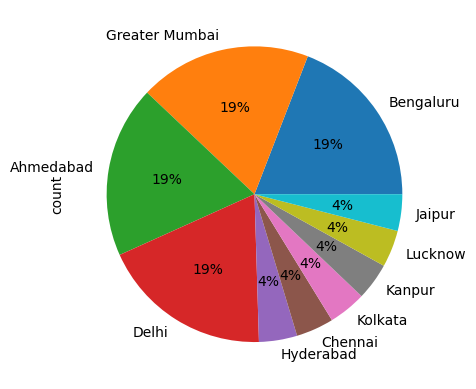

In [46]:
pd.value_counts(cities)[0:10].plot(kind='pie',autopct='%1.0f%%')

In [47]:
exp=dataset['Exp Type']
exp

0                   Food
1          Entertainment
2                   Fuel
3                   Food
4                   Fuel
               ...      
1048569             Fuel
1048570          Grocery
1048571             Fuel
1048572          Grocery
1048573            Bills
Name: Exp Type, Length: 1048574, dtype: object

In [48]:
pd.value_counts(exp)

C:\Users\Naresh\AppData\Local\Temp\ipykernel_10100\4222521040.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(exp)


Exp Type
Food              220115
Fuel              211830
Bills             204502
Entertainment     191413
Grocery           191074
Travel             29520
Personal_Care         40
Health_Fitness        40
Home                  40
Name: count, dtype: int64

C:\Users\Naresh\AppData\Local\Temp\ipykernel_10100\105409734.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(exp).plot(kind='bar')


<Axes: xlabel='Exp Type'>

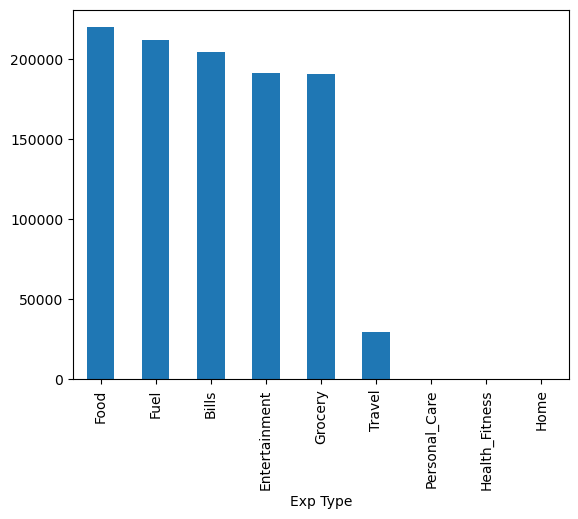

In [49]:
pd.value_counts(exp).plot(kind='bar')

In [50]:
card=dataset['Card Type']
card

0               Gold
1               Gold
2             Silver
3               Gold
4               Gold
             ...    
1048569     Platinum
1048570         Gold
1048571         Gold
1048572     Platinum
1048573    Signature
Name: Card Type, Length: 1048574, dtype: object

In [51]:
pd.value_counts(card)

C:\Users\Naresh\AppData\Local\Temp\ipykernel_10100\1602574902.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(card)


Card Type
Silver       275540
Signature    259327
Platinum     257374
Gold         256173
Classic          80
Mass             80
Name: count, dtype: int64

C:\Users\Naresh\AppData\Local\Temp\ipykernel_10100\2120340564.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(card).plot(kind='bar')


<Axes: xlabel='Card Type'>

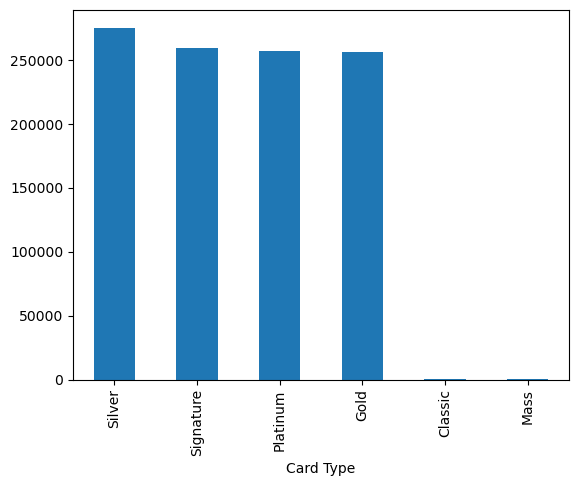

In [52]:
pd.value_counts(card).plot(kind='bar')